In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
import numpy as np


In [2]:
df = pd.read_pickle('df_num')

In [3]:
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(df)

Kmeans aplicado diretamente com as 2 primeiras colunas do DF (peso molecular e logP)

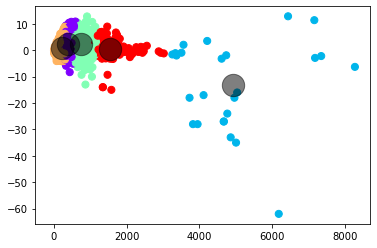

In [6]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_pred, s=50, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5)

aplicação de filtro pra vizualizar 2 clusters

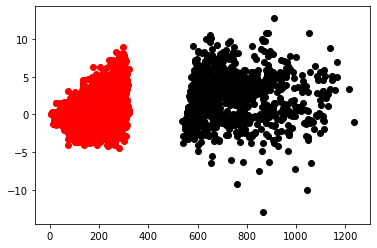

In [7]:
#filter rows of original data
filtered_label2 = df[y_pred == 3]
 
filtered_label8 = df[y_pred == 2]
 
#Plotting the results
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , color = 'red')
plt.scatter(filtered_label8.iloc[:,0] , filtered_label8.iloc[:,1] , color = 'black')
plt.show()

aplicaçao metodo elbow e aplicação do kmeans com o dado tratado no standardscaler com base visto em https://realpython.com/k-means-clustering-python/

In [8]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler = StandardScaler()

dfscaled = standard_scaler.fit_transform(df)


pca = PCA(n_components=2)

pComp = pca.fit_transform(dfscaled)


1 143692.70791739048
2 95280.90246752258
3 65285.484910215215
4 43326.37583184763
5 34148.07834507202
6 29242.16622794242
7 24129.350664957805
8 21005.804659465255
9 18012.95611130639
10 16281.480892134583


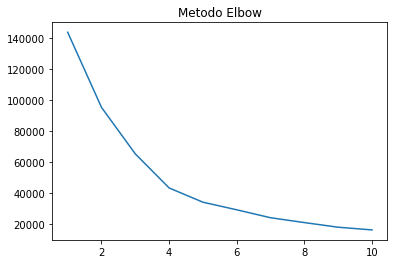

In [10]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i , init = 'random')
    kmeans.fit(pComp)
    print(i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Metodo Elbow')

plt.show()

In [11]:
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(pComp)


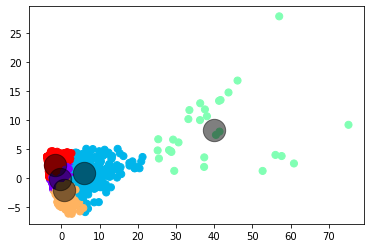

In [12]:
plt.scatter(pComp[:, 0], pComp[:, 1], c=y_pred, s=50, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5)

In [13]:
# #Importing required modules
 
# from sklearn.datasets import load_digits
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# import numpy as np
# from sklearn.cluster import KMeans
 
# #Initialize the class object
# kmeans = KMeans(n_clusters= 4)
 
# #predict the labels of clusters.
# label = kmeans.fit_predict(dfscaled)
 
# #Getting unique labels
# u_labels = np.unique(label)
 
# #plotting the results:
# for i in u_labels:
#     plt.scatter(dfscaled[label == i , 0] , dfscaled[label == i , 1] , label = i)
# plt.legend()
# plt.show()

Aplicação do PCA e clusterização com base no geron

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(df)


In [15]:
pca.explained_variance_ratio_


array([0.96821802, 0.02671609])

In [17]:
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X2D)
kmeans.cluster_centers_

array([[ 1.26602848e+01, -9.49897440e+00],
       [ 5.02861455e+03,  2.21319759e+02],
       [-1.82112399e+02,  2.20408870e+01],
       [ 1.26619320e+03, -1.96777025e+00],
       [ 3.80164321e+02, -2.17938951e+01]])

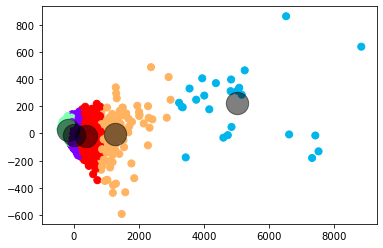

In [18]:
plt.scatter(X2D[:, 0], X2D[:, 1], c=y_pred, s=50, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5)

PCA e clusterização metodo 2

In [41]:
scaler = StandardScaler()
scaler.fit(df)

scaled_data = scaler.transform(df)

scaled_data


array([[ 3.04914108e-15,  2.18113863e-15,  1.77030648e-15, ...,
         9.16048946e-15, -2.24735566e-16,  0.00000000e+00],
       [ 3.04914108e-15,  2.18113863e-15,  1.77030648e-15, ...,
         9.16048946e-15, -2.24735566e-16,  0.00000000e+00],
       [ 3.04914108e-15,  2.18113863e-15,  1.77030648e-15, ...,
         9.16048946e-15, -2.24735566e-16,  0.00000000e+00],
       ...,
       [ 3.04914108e-15,  2.18113863e-15,  1.77030648e-15, ...,
         9.16048946e-15, -2.24735566e-16,  0.00000000e+00],
       [ 3.04914108e-15,  2.18113863e-15,  1.77030648e-15, ...,
         9.16048946e-15, -2.24735566e-16,  0.00000000e+00],
       [ 3.04914108e-15,  2.18113863e-15,  1.77030648e-15, ...,
         9.16048946e-15, -2.24735566e-16,  0.00000000e+00]])

In [40]:
pca = PCA(n_components = 2)


principal_components = pca.fit_transform(scaled_data)


principalDf = pd.DataFrame(data = principal_components , columns = ['principal component 1', 'principal component 2'])

principalDf

,principal component 1,principal component 2
0,7.063219e-16,-2.328329e-14
1,5.218900e-15,9.352138e-16
2,5.210237e-15,-6.467392e-16
3,5.222024e-15,-2.323355e-16
4,5.241285e-15,-4.476057e-16
...,...,...
14310,5.221385e-15,-3.311505e-16
14311,5.221385e-15,-3.311505e-16
14312,5.221385e-15,-3.311505e-16
14313,5.221385e-15,-3.311505e-16


metodo elbow para descobrir o K ideal

1 143692.70791739103
2 95270.07250133705
3 65285.484910090076
4 43326.375831802565
5 34147.60979453652
6 28427.458011434945
7 25356.325180880216
8 21056.174799866618
9 18012.049003745135
10 16280.345464034006


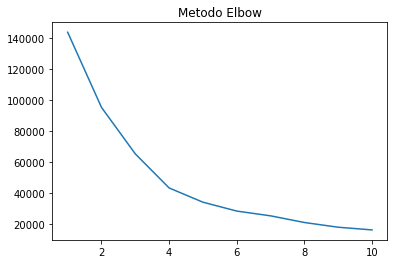

In [44]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i , init = 'random')
    kmeans.fit(principal_components )
    print(i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Metodo Elbow')

plt.show()

In [37]:
pca.explained_variance_ratio_.cumsum()

array([0.49636362, 0.7169937 ])

71,7% do dado pelo pca de 2 componentes

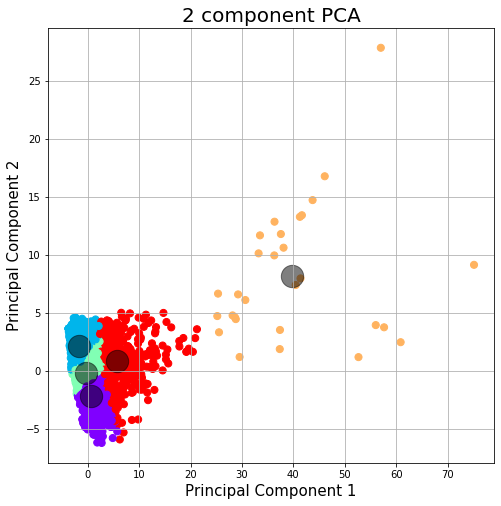

In [46]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


k = 5
kmeans2 = KMeans(n_clusters=k)
y_pred = kmeans2.fit_predict(principalDf)
kmeans2.cluster_centers_


plt.scatter(principalDf.loc[:,'principal component 1'], principalDf.loc[:,'principal component 2'], c=y_pred, s=50, cmap='rainbow')
centers2 = kmeans2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=500, alpha=0.5)



ax.grid()